In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
df = pd.read_csv("homeprice.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


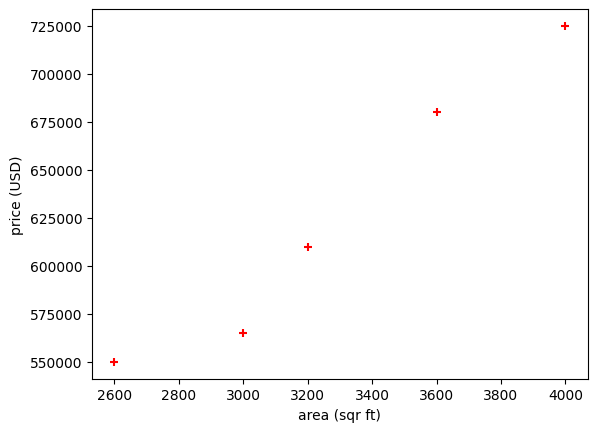

In [4]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel("price (USD)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [5]:
reg = linear_model.LinearRegression()
 # the first argument should be a 2d arr

In [6]:
reg.fit(df[['area']],df.price)

LinearRegression()

In [7]:
reg.coef_

array([135.78767123])

In [9]:
reg.predict([[3300]])

C:\Users\Ali Neaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_,reg.intercept_

(array([135.78767123]), 180616.43835616432)

In [13]:
# y = b0+b1x
180616.43835616432+135.78767123*3300

628715.7534151643

In [15]:
# For 5000 Sq feet
reg.predict([[5000]])

C:\Users\Ali Neaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

# Predicting with custom input

In [31]:
l = [i*100 for i in range(10)]
l

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [32]:
d = pd.DataFrame(l)
d.head()

,0
0,0
1,100
2,200
3,300
4,400


In [33]:
d = d.rename_axis("0",axis=1)

In [34]:
d.head()

0,0
0,0
1,100
2,200
3,300
4,400


In [37]:
p = reg.predict(d)

C:\Users\Ali Neaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
d['prices']=p # will create a new data frame containg price
d.head()

0,0,prices
0,0,180616.438356
1,100,194195.205479
2,200,207773.972603
3,300,221352.739726
4,400,234931.506849


In [41]:
d.to_csv("Predicted.csv",index = False) # if you don't want the index

### Fitted line

In [57]:
ll = [i*1000 for i in range(1,6)]
dd = pd.DataFrame(ll)
dd.head()

,0
0,1000
1,2000
2,3000
3,4000
4,5000


In [58]:
len(df.area)

5

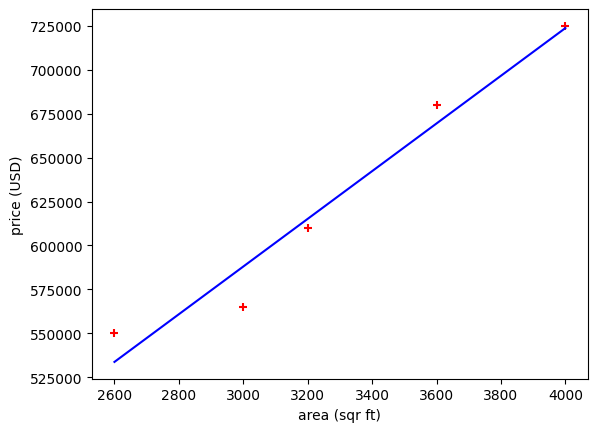

In [61]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel("price (USD)")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[['area']]),color="blue")
plt.show()# facing some problems i guess

In [45]:
type(d)

pandas.core.frame.DataFrame

In [46]:
d

0,0,prices
0,0,180616.438356
1,100,194195.205479
2,200,207773.972603
3,300,221352.739726
4,400,234931.506849
5,500,248510.273973
6,600,262089.041096
7,700,275667.808219
8,800,289246.575342
9,900,302825.342466


### Use Canada net income percapita for the year of 2023

In [66]:
canada=pd.read_csv("canada_per_capita.csv")
canada.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


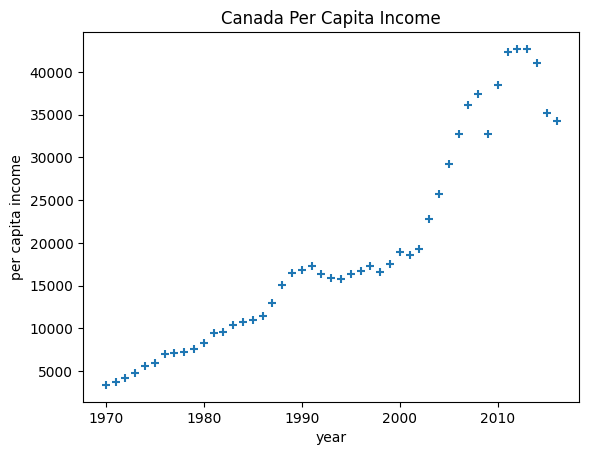

In [71]:
%matplotlib inline
plt.xlabel("year")
plt.ylabel("per capita income")
plt.title("Canada Per Capita Income")
plt.scatter(canada.year,canada.per_capita_income,marker='+')

In [64]:
reg = linear_model.LinearRegression()

In [72]:
reg.fit(canada[['year']],canada.per_capita_income)

LinearRegression()

In [75]:
reg.coef_,reg.intercept_

(array([828.46507522]), -1632210.7578554575)

In [76]:
# The predicted value for the year 2023 is:
reg.predict([[2023]])

C:\Users\Ali Neaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

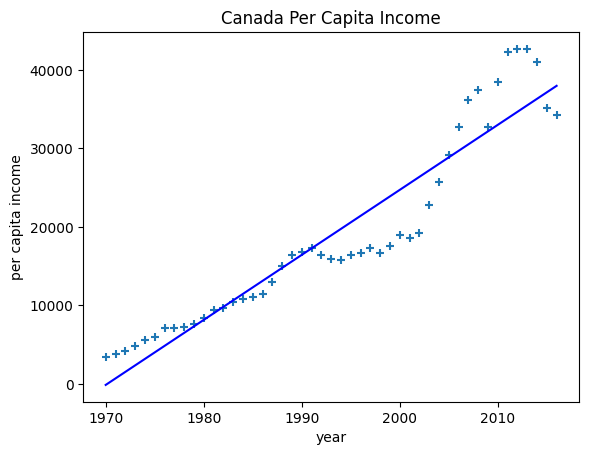

In [85]:
%matplotlib inline
plt.xlabel("year")
plt.ylabel("per capita income")
plt.title("Canada Per Capita Income")
plt.scatter(canada.year,canada.per_capita_income,marker='+')
plt.plot(canada.year,reg.predict(canada[['year']]),color="blue")
# plt.legend()
plt.show()